<a href="https://colab.research.google.com/github/MichaelGajhede/superdex_75_calibration/blob/main/superdex_75_calib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SEC Calibration: $\log(MW)$ vs. $K_{av}$

In size exclusion chromatography (SEC), the elution behavior of molecules is related to their size in solution. While elution volume ($V_e$) is the most common parameter, $K_{av}$ can also be used.

### 1. Understanding $K_{av}$

The parameter $K_{av}$ represents the fraction of the stationary phase accessible to a solute molecule:

$\
K_{av} = \frac{V_e - V_o}{V_t - V_o}
\$

Where:

* $V_e$ = Elution volume
* $V_o$ = Void volume
* $V_t$ = Total column volume

### 2. Calibration Procedure

1.  **Run Standards:** Inject standards with known molecular weights ($MW$).
2.  **Measure $V_e$:** Determine the elution volume for each standard.
3.  **Determine $V_o$ and $V_t$:**
    * $V_o$: Elution volume of a very large molecule.
    * $V_t$: Column volume (from dimensions or manufacturer).
4.  **Calculate $K_{av}$:** Calculate $K_{av}$ for each standard.
5.  **Plot Calibration Curve:** Plot $\log(MW)$ vs. $K_{av}$.
6.  **Fit the Data:** Fit the data to a function (e.g., polynomial, usually just to second order, a straight line):

    $
    \log(MW) = a_0 + a_1 K_{av} + a_2 K_{av}^2 + ... + a_n K_{av}^n
    $

    Where $a_i$ are constants.

### 3. Using the Calibration Curve

For an unknown sample:

1.  Measure $V_e$.
2.  Calculate $K_{av}$.
3.  Determine $MW_{unknown}$:

    $\
    M_{unknown} = 10^{(a_0 + a_1 K_{av,unknown} + a_2 K_{av,unknown}^2 + ... + a_n K_{av,unknown}^n)}
    \$

### 4. Advantages of $K_{av}$

* Normalized parameter.
* Direct measure of stationary phase accessibility.

### 5. Considerations

* Same precautions as with $V_e$ calibration.
* Accurate $V_o$ and $V_t$ are crucial.
* Empirical relationship, requires a suitable fit.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data extracted from the image
data = {
    'Sample': [
        '1. BSA (Mr 67 000) 8 mg/ml',
        '2. Ovalbumin (Mr 43 000) 2.5 mg/ml',
        '3. Ribonuclease A (Mr 13 700) 5 mg/ml',
        '4. Aprotinin (Mr 6 512) 2 mg/ml',
        '5. Vitamin B12 (Mr 1 355) 0.1 mg/ml'
    ],
    'Elution Volume (ml)': [8.2,9.6,11.4,13.1,19.1]
}

# Create the DataFrame
df_standards = pd.DataFrame(data)


# Extract the number from within the parentheses
df_standards['MW (Mr)'] = df_standards['Sample'].str.extract(r'Mr\s(\d+)')

# Convert the extracted 'MW (Mr)' column to numeric
df_standards['MW (Mr)'] = pd.to_numeric(df_standards['MW (Mr)'])

# Print the DataFrame
print(df_standards)


                                  Sample  Elution Volume (ml)  MW (Mr)
0             1. BSA (Mr 67 000) 8 mg/ml                  8.2       67
1     2. Ovalbumin (Mr 43 000) 2.5 mg/ml                  9.6       43
2  3. Ribonuclease A (Mr 13 700) 5 mg/ml                 11.4       13
3        4. Aprotinin (Mr 6 512) 2 mg/ml                 13.1        6
4    5. Vitamin B12 (Mr 1 355) 0.1 mg/ml                 19.1        1


Slope and intercept: [-0.1557373   0.65131774]


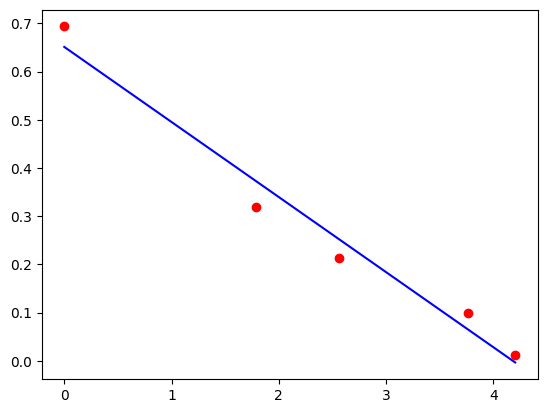

,Sample,Elution Volume (ml),MW (Mr),K average
0,1. BSA (Mr 67 000) 8 mg/ml,8.2,67,0.01250
1,2. Ovalbumin (Mr 43 000) 2.5 mg/ml,9.6,43,0.10000
2,3. Ribonuclease A (Mr 13 700) 5 mg/ml,11.4,13,0.21250
3,4. Aprotinin (Mr 6 512) 2 mg/ml,13.1,6,0.31875
4,5. Vitamin B12 (Mr 1 355) 0.1 mg/ml,19.1,1,0.69375


In [ ]:
# least squares fit of Kav=a*lnMW+b where Kav=(Vret-Vo)/(Vcol-Vo) determine intercept and slope
import numpy as np
from scipy.sparse import rand
from scipy.optimize import curve_fit

V0 = 8 #Superdex 75 10/300 increase void volume
Vcol = 24 #Superdex 73 10/300 increase total volume
Kavs =[]
for i in df_standards['Elution Volume (ml)']:
    Kav = (i-V0)/(Vcol-V0)
    Kavs.append(Kav)

df_standards['K average'] = Kavs



x = np.log(df_standards['MW (Mr)'].to_numpy())
y = df_standards['K average'].to_numpy()

def func(x, a, b):
    y = a*x + b
    return y

alpha_MW = curve_fit(func, xdata = x, ydata = y)[0] # returns slope and intercept tupple
print('Slope and intercept:', alpha_MW)

plt.plot(x, y, 'ro', label='K Average observed')
plt.plot(x, func(x, *alpha_MW), 'b-', label='K average fit')
plt.show()

df_standards


In [ ]:
# calculate MW of sample with known elution time

sample_elution_ml = 10

Kav = (sample_elution_ml-V0)/(Vcol-V0)
MW_sample = int(np.exp((Kav- alpha_MW[1])/alpha_MW[0]))
print('Sample eluting at:' , sample_elution_ml, 'ml has a molecular weight of:',  MW_sample, 'kDa')


Sample eluting at: 10 ml has a molecular weight of: 29 kDa
